In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Dropout, SeparableConv1D, BatchNormalization, InputLayer, Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model,to_categorical
import pandas as pd
import seaborn as sns
import time

In [2]:
label_train = np.load("array/label_train_smote.npy")
img_train = np.load("array/img_train_smote.npy")
label_val = np.load("array/label_val_smote.npy")
img_val = np.load("array/img_val_smote.npy")
label_test = np.load("array/label_test.npy")
img_test = np.load("array/img_test.npy")

In [3]:
print(img_train.shape, img_val.shape)
print(label_train.shape, label_val.shape)

(9580, 20) (1368, 20)
(9580,) (1368,)


In [4]:
label_train = to_categorical(label_train)
label_val = to_categorical(label_val)
label_test = to_categorical(label_test) 


In [5]:
print(label_train.shape, label_val.shape)

(9580, 2) (1368, 2)


In [6]:

label_train = np.reshape(label_train, (label_train.shape[0], 2))
img_train = np.reshape(img_train, (img_train.shape[0], img_train.shape[1], 1))
label_val = np.reshape(label_val, (label_val.shape[0], 2))
img_val = np.reshape(img_val, (img_val.shape[0], img_val.shape[1],  1))
label_test = np.reshape(label_test, (label_test.shape[0], 2))
img_test = np.reshape(img_test, (img_test.shape[0], img_test.shape[1],  1))

In [7]:
print(img_train.shape, img_val.shape)
print(label_train.shape, label_val.shape)

(9580, 20, 1) (1368, 20, 1)
(9580, 2) (1368, 2)


In [8]:
model = Sequential()
model.add(InputLayer(input_shape=(20,1)))

model.add(Conv1D(8, kernel_size=3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(2)) 

model.add(Conv1D(16, kernel_size=3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(2)) 

model.add(Conv1D(32, kernel_size=3))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(500))
model.add(Activation('relu'))

model.add(Dense(450))
model.add(Activation('relu'))

model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'mae'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 18, 8)             32        
_________________________________________________________________
batch_normalization (BatchNo (None, 18, 8)             32        
_________________________________________________________________
activation (Activation)      (None, 18, 8)             0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 9, 8)              0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 7, 16)             400       
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 16)             64        
_________________________________________________________________
activation_1 (Activation)    (None, 7, 16)             0

In [9]:
checkpoint = ModelCheckpoint("cough_02.h5", monitor='val_accuracy', verbose=1, 
                             save_best_only=True, save_weights_only=False, mode='auto')

In [10]:
start = time.time()
history = model.fit(img_train,label_train, epochs=200, steps_per_epoch = 5, validation_data=(img_val, label_val),callbacks=[checkpoint])
stop = time.time()
print(f"Training time: {stop - start}s")

Epoch 1/200
5/5 [==============================] - 2s 110ms/step - loss: 0.4835 - accuracy: 0.7620 - mae: 0.3543 - val_loss: 2.3840 - val_accuracy: 0.5000 - val_mae: 0.4944

Epoch 00001: val_accuracy improved from -inf to 0.50000, saving model to cough_02.h5
Epoch 2/200
5/5 [==============================] - 0s 30ms/step - loss: 0.2828 - accuracy: 0.8864 - mae: 0.1785 - val_loss: 2.7726 - val_accuracy: 0.5000 - val_mae: 0.4967

Epoch 00002: val_accuracy did not improve from 0.50000
Epoch 3/200
5/5 [==============================] - 0s 29ms/step - loss: 0.2424 - accuracy: 0.9061 - mae: 0.1270 - val_loss: 2.7919 - val_accuracy: 0.5000 - val_mae: 0.4968

Epoch 00003: val_accuracy did not improve from 0.50000
Epoch 4/200
5/5 [==============================] - 0s 32ms/step - loss: 0.2244 - accuracy: 0.9123 - mae: 0.1146 - val_loss: 1.9170 - val_accuracy: 0.5000 - val_mae: 0.4856

Epoch 00004: val_accuracy did not improve from 0.50000
Epoch 5/200
5/5 [==============================] - 0s 33m

5/5 [==============================] - 0s 32ms/step - loss: 0.0986 - accuracy: 0.9601 - mae: 0.0627 - val_loss: 0.1861 - val_accuracy: 0.9240 - val_mae: 0.1240

Epoch 00034: val_accuracy did not improve from 0.92471
Epoch 35/200
5/5 [==============================] - 0s 31ms/step - loss: 0.0951 - accuracy: 0.9616 - mae: 0.0600 - val_loss: 0.1815 - val_accuracy: 0.9225 - val_mae: 0.1164

Epoch 00035: val_accuracy did not improve from 0.92471
Epoch 36/200
5/5 [==============================] - 0s 33ms/step - loss: 0.0932 - accuracy: 0.9618 - mae: 0.0596 - val_loss: 0.1834 - val_accuracy: 0.9225 - val_mae: 0.1150

Epoch 00036: val_accuracy did not improve from 0.92471
Epoch 37/200
5/5 [==============================] - 0s 32ms/step - loss: 0.0928 - accuracy: 0.9624 - mae: 0.0587 - val_loss: 0.1790 - val_accuracy: 0.9247 - val_mae: 0.1132

Epoch 00037: val_accuracy did not improve from 0.92471
Epoch 38/200
5/5 [==============================] - 0s 33ms/step - loss: 0.0880 - accuracy: 0.963

5/5 [==============================] - 0s 32ms/step - loss: 0.0460 - accuracy: 0.9814 - mae: 0.0309 - val_loss: 0.2016 - val_accuracy: 0.9364 - val_mae: 0.0810

Epoch 00069: val_accuracy did not improve from 0.93787
Epoch 70/200
5/5 [==============================] - 0s 30ms/step - loss: 0.0415 - accuracy: 0.9826 - mae: 0.0292 - val_loss: 0.1884 - val_accuracy: 0.9371 - val_mae: 0.0807

Epoch 00070: val_accuracy did not improve from 0.93787
Epoch 71/200
5/5 [==============================] - 0s 30ms/step - loss: 0.0406 - accuracy: 0.9831 - mae: 0.0290 - val_loss: 0.2082 - val_accuracy: 0.9342 - val_mae: 0.0790

Epoch 00071: val_accuracy did not improve from 0.93787
Epoch 72/200
5/5 [==============================] - 0s 30ms/step - loss: 0.0388 - accuracy: 0.9838 - mae: 0.0273 - val_loss: 0.1969 - val_accuracy: 0.9371 - val_mae: 0.0782

Epoch 00072: val_accuracy did not improve from 0.93787
Epoch 73/200
5/5 [==============================] - 0s 32ms/step - loss: 0.0385 - accuracy: 0.983

5/5 [==============================] - 0s 33ms/step - loss: 0.0210 - accuracy: 0.9908 - mae: 0.0158 - val_loss: 0.3014 - val_accuracy: 0.9269 - val_mae: 0.0766

Epoch 00105: val_accuracy did not improve from 0.93787
Epoch 106/200
5/5 [==============================] - 0s 30ms/step - loss: 0.0217 - accuracy: 0.9890 - mae: 0.0157 - val_loss: 0.3105 - val_accuracy: 0.9284 - val_mae: 0.0761

Epoch 00106: val_accuracy did not improve from 0.93787
Epoch 107/200
5/5 [==============================] - 0s 32ms/step - loss: 0.0226 - accuracy: 0.9887 - mae: 0.0166 - val_loss: 0.3064 - val_accuracy: 0.9211 - val_mae: 0.0813

Epoch 00107: val_accuracy did not improve from 0.93787
Epoch 108/200
5/5 [==============================] - 0s 29ms/step - loss: 0.0228 - accuracy: 0.9890 - mae: 0.0165 - val_loss: 0.3055 - val_accuracy: 0.9327 - val_mae: 0.0733

Epoch 00108: val_accuracy did not improve from 0.93787
Epoch 109/200
5/5 [==============================] - 0s 30ms/step - loss: 0.0214 - accuracy: 0


Epoch 00140: val_accuracy did not improve from 0.93787
Epoch 141/200
5/5 [==============================] - 0s 32ms/step - loss: 0.0162 - accuracy: 0.9901 - mae: 0.0118 - val_loss: 0.3785 - val_accuracy: 0.9240 - val_mae: 0.0801

Epoch 00141: val_accuracy did not improve from 0.93787
Epoch 142/200
5/5 [==============================] - 0s 30ms/step - loss: 0.0173 - accuracy: 0.9900 - mae: 0.0124 - val_loss: 0.3600 - val_accuracy: 0.9298 - val_mae: 0.0706

Epoch 00142: val_accuracy did not improve from 0.93787
Epoch 143/200
5/5 [==============================] - 0s 31ms/step - loss: 0.0151 - accuracy: 0.9919 - mae: 0.0113 - val_loss: 0.3583 - val_accuracy: 0.9254 - val_mae: 0.0765

Epoch 00143: val_accuracy did not improve from 0.93787
Epoch 144/200
5/5 [==============================] - 0s 32ms/step - loss: 0.0148 - accuracy: 0.9913 - mae: 0.0111 - val_loss: 0.3647 - val_accuracy: 0.9240 - val_mae: 0.0761

Epoch 00144: val_accuracy did not improve from 0.93787
Epoch 145/200
5/5 [=====

5/5 [==============================] - 0s 32ms/step - loss: 0.0142 - accuracy: 0.9906 - mae: 0.0105 - val_loss: 0.4312 - val_accuracy: 0.9167 - val_mae: 0.0834

Epoch 00176: val_accuracy did not improve from 0.94079
Epoch 177/200
5/5 [==============================] - 0s 28ms/step - loss: 0.0138 - accuracy: 0.9919 - mae: 0.0103 - val_loss: 0.4358 - val_accuracy: 0.9189 - val_mae: 0.0815

Epoch 00177: val_accuracy did not improve from 0.94079
Epoch 178/200
5/5 [==============================] - 0s 29ms/step - loss: 0.0148 - accuracy: 0.9908 - mae: 0.0111 - val_loss: 0.4362 - val_accuracy: 0.9211 - val_mae: 0.0795

Epoch 00178: val_accuracy did not improve from 0.94079
Epoch 179/200
5/5 [==============================] - 0s 33ms/step - loss: 0.0146 - accuracy: 0.9919 - mae: 0.0109 - val_loss: 0.4345 - val_accuracy: 0.9232 - val_mae: 0.0796

Epoch 00179: val_accuracy did not improve from 0.94079
Epoch 180/200
5/5 [==============================] - 0s 33ms/step - loss: 0.0138 - accuracy: 0

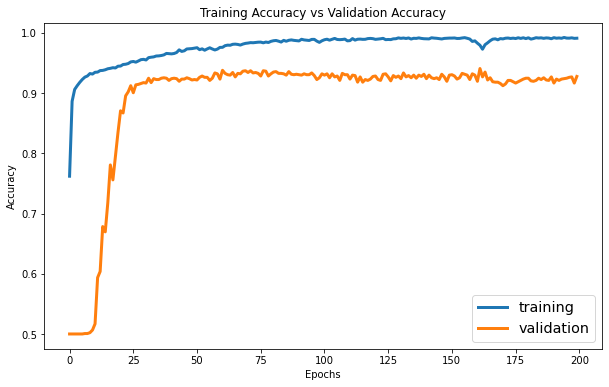

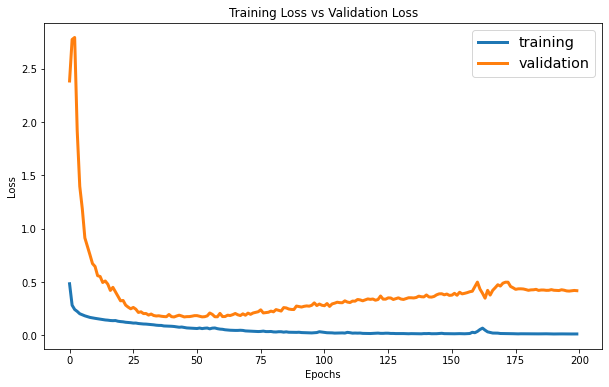

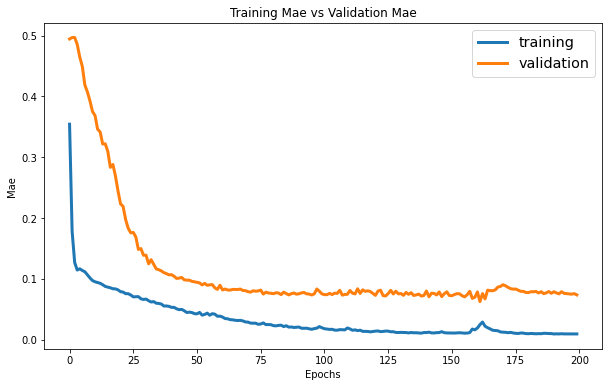

In [11]:
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'], label = 'training', linewidth = 3)
plt.plot(history.history['val_accuracy'], label = 'validation', linewidth = 3)
plt.title('Training Accuracy vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(fontsize = 'x-large')
plt.show()
#plt.savefig("Pic/Training Accuracy vs Validation Accuracy_Batuk.jpg")

plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label = 'training', linewidth = 3)
plt.plot(history.history['val_loss'], label = 'validation', linewidth = 3)
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(fontsize = 'x-large')
plt.show()

plt.figure(figsize=(10,6))
plt.plot(history.history['mae'], label = 'training', linewidth = 3)
plt.plot(history.history['val_mae'], label = 'validation', linewidth = 3)
plt.title('Training Mae vs Validation Mae')
plt.xlabel('Epochs')
plt.ylabel('Mae')
plt.legend(fontsize = 'x-large')
plt.show()
#plt.savefig("Pic/Training Loss vs Validation Loss_Batuk.jpg")

In [14]:
model.load_weights("cough_02.h5")

              precision    recall  f1-score   support

       cough       0.94      0.95      0.94       684
        talk       0.95      0.94      0.94       684

    accuracy                           0.94      1368
   macro avg       0.94      0.94      0.94      1368
weighted avg       0.94      0.94      0.94      1368



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

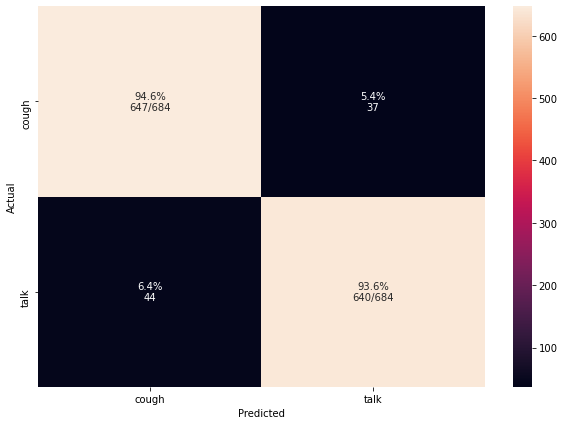

In [15]:
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
matrix_index = ['cough', 'talk']

preds = model.predict(img_val)
classpreds = np.argmax(preds, axis=1) # predicted classes 
y_testclass = np.argmax(label_val, axis=1) # true classes

cm = confusion_matrix(y_testclass, classpreds)
print(classification_report(y_testclass, classpreds, target_names=matrix_index))

# Get percentage value for each element of the matrix
cm_sum = np.sum(cm, axis=1, keepdims=True)
cm_perc = cm / cm_sum.astype(float) * 100
annot = np.empty_like(cm).astype(str)
nrows, ncols = cm.shape
for i in range(nrows):
    for j in range(ncols):
        c = cm[i, j]
        p = cm_perc[i, j]
        if i == j:
            s = cm_sum[i]
            annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
        elif c == 0:
            annot[i, j] = ''
        else:
            annot[i, j] = '%.1f%%\n%d' % (p, c)


# Display confusion matrix 
df_cm = pd.DataFrame(cm, index = matrix_index, columns = matrix_index)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(df_cm, annot=annot, fmt='')
#plt.savefig("Pic/Table Crosscheck_Batuk.jpg")

              precision    recall  f1-score   support

       cough       0.84      0.93      0.88       549
        talk       0.97      0.93      0.95      1369

    accuracy                           0.93      1918
   macro avg       0.90      0.93      0.91      1918
weighted avg       0.93      0.93      0.93      1918



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

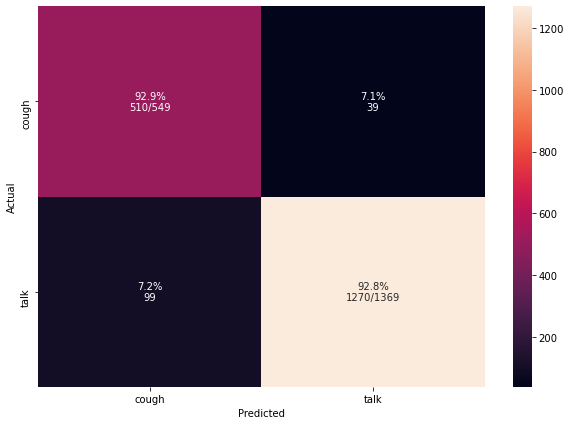

In [16]:
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
matrix_index = ['cough', 'talk']

preds = model.predict(img_test)
classpreds = np.argmax(preds, axis=1) # predicted classes 
y_testclass = np.argmax(label_test, axis=1) # true classes

cm = confusion_matrix(y_testclass, classpreds)
print(classification_report(y_testclass, classpreds, target_names=matrix_index))

# Get percentage value for each element of the matrix
cm_sum = np.sum(cm, axis=1, keepdims=True)
cm_perc = cm / cm_sum.astype(float) * 100
annot = np.empty_like(cm).astype(str)
nrows, ncols = cm.shape
for i in range(nrows):
    for j in range(ncols):
        c = cm[i, j]
        p = cm_perc[i, j]
        if i == j:
            s = cm_sum[i]
            annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
        elif c == 0:
            annot[i, j] = ''
        else:
            annot[i, j] = '%.1f%%\n%d' % (p, c)


# Display confusion matrix 
df_cm = pd.DataFrame(cm, index = matrix_index, columns = matrix_index)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(df_cm, annot=annot, fmt='')
#plt.savefig("Pic/Table Crosscheck_Batuk.jpg")